In [365]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [366]:
#Load the testing and training data sets and transpose them to be shape x n_samples
X_train = np.loadtxt("input.csv", delimiter=",").T
Y_train = np.loadtxt("labels.csv", delimiter=",").T
X_test = np.loadtxt("xtest.csv",delimiter=",").T
Y_test = np.loadtxt("ytest.csv",delimiter=",").T
X2_test = np.loadtxt("x2test.csv", delimiter=",").T
Y2_test = np.loadtxt("y2test.csv", delimiter=",").T

In [367]:
#Print the shape of the training and testing sets
print("Shape X Train:", X_train.shape)
print("Shape Y Train:", Y_train.shape)
print("Shape X Train:", X_test.shape)
print("Shape Y Train:", Y_test.shape)

Shape X Train: (45, 50)
Shape Y Train: (10, 50)
Shape X Train: (45, 30)
Shape Y Train: (10, 30)


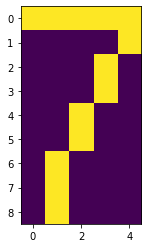

In [368]:
#Show a random image from the training data set
index = random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:, index].reshape(9,5))
plt.show()

In [369]:
# Define sigmoid for input activation, cross entropy for output activation and sigmoid derivative for back propogation

def sigmoid(x):
    sigmoid = 1.0/(1+ np.exp(-x))
    return sigmoid

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def sigmoid_derivative(x):
    derivative = sigmoid(x)*(1 - sigmoid(x))
    return derivative

In [370]:
#Initialize Parameters
def initialize(inputs, hidden, outputs):
    weight1 = np.random.randn(hidden, inputs)
    bias1 = np.zeros((hidden, 1))
    
    weight2 = np.random.randn(outputs, hidden)
    bias2 = np.zeros((outputs, 1))

    weightsAndBiases = {
        "weight1" : weight1,
        "bias1" : bias1,
        "weight2" : weight2,
        "bias2" : bias2
    }
    
    return weightsAndBiases

In [371]:
#Forward propogation of weights and biases
def fpropogate(x, weightsAndBiases):
    weight1 = weightsAndBiases["weight1"]
    bias1 = weightsAndBiases["bias1"]
    weight2 = weightsAndBiases["weight2"]
    bias2 = weightsAndBiases["bias2"]
    
    out1 = np.dot(weight1, x) + bias1
    activation1 = sigmoid(out1)
    
    out2 = np.dot(weight2, activation1) + bias2
    activation2 = softmax(out2)
    
    forwardSet = {
        "out1" : out1,
        "activation1" : activation1,
        "out2" : out2,
        "activation2" : activation2
    }
    return forwardSet

In [372]:
#Cross entropy cost function
def crossEntropyCostFunction(activation2, y):
    numOfTests = y.shape[1]
    
    cost = -(1/numOfTests)*np.sum(y*np.log(activation2))
    
    return cost

In [373]:
#Back propogation 
def bpropogate(x, y, weightsAndBiases, forwardSet):
    
    weight1 = weightsAndBiases["weight1"]
    bias1 = weightsAndBiases["bias1"]
    weight2 = weightsAndBiases["weight2"]
    bias2 = weightsAndBiases["bias2"]
    
    activation1 = forwardSet["activation1"]
    activation2 = forwardSet["activation2"]
    
    numOfImages = x.shape[1]
    
    error2 = activation2 - y
    trainedWeight2 = (1/numOfImages)*np.dot(error2, activation1.T)
    trainedBias2 = (1/numOfImages)*np.sum(error2, axis=1, keepdims=True)
    
    error1 = (1/numOfImages)*np.dot(weight2.T, error2)*sigmoid_derivative(activation1)
    trainedWeight1 = (1/numOfImages)*np.dot(error1, x.T)
    trainedBias1 = (1/numOfImages)*np.sum(error1, axis=1, keepdims=True)
    
    gradient = {
        "trainedWeight1" : trainedWeight1,
        "trainedBias1" : trainedBias1,
        "trainedWeight2" : trainedWeight2,
        "trainedBias2" : trainedBias2
    }
    
    return gradient

In [374]:
#Update weights and bias for next iteration based on learning rate
def updateWeightandBiases(weightsAndBiases, gradient, learningRate):
    weight1 = weightsAndBiases["weight1"]
    bias1 = weightsAndBiases["bias1"]
    weight2 = weightsAndBiases["weight2"]
    bias2 = weightsAndBiases["bias2"]
    
    trainedWeight1 = gradient["trainedWeight1"]
    trainedBias1 = gradient["trainedBias1"]
    trainedWeight2 = gradient["trainedWeight2"] 
    trainedBias2 = gradient["trainedBias2"]
    
    updatedWeight1 = weight1 - learningRate*trainedWeight1
    updatedBias1 = bias1 - learningRate*trainedBias1
    updatedWeight2 = weight2 - learningRate*trainedWeight2
    updatedBias2 = bias2 - learningRate*trainedBias2
    
    updatedWB = {
        "weight1" : updatedWeight1,
        "bias1" : updatedBias1,
        "weight2" : updatedWeight2,
        "bias2" : updatedBias2,
    }
    return updatedWB

In [375]:
#Full ANN model code
def annModel(x, y, hidden, learningRate, epochs):
    
    numOfPixels = x.shape[0]
    numOfClasses = y.shape[0]
    
    costValues = []
    
    weightsAndBiases = initialize(numOfPixels, hidden, numOfClasses)
    
    for i in range(epochs):
        
        forwardSet = fpropogate(x, weightsAndBiases)
        
        cost = crossEntropyCostFunction(forwardSet['activation2'], y)
        
        gradient = bpropogate(x, y, weightsAndBiases, forwardSet)
        
        weightsAndBiases = updateWeightandBiases(weightsAndBiases, gradient, learningRate)
        
        costValues.append(cost)
        
    return weightsAndBiases, costValues

In [376]:
#Run the ANN Model
epochs = 500000
hidden = 5
learningRate = 0.05

weightsAndBiases, costValues = annModel(X_train, Y_train, hidden, learningRate, epochs)

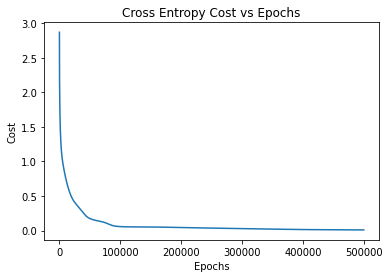

In [377]:
#Cost Values vs Epochs
c = np.arange(0, epochs)
plt.title("Cross Entropy Cost vs Epochs") 
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(c, costValues)
plt.show()

In [378]:
def accuracy(x, classes, weightsAndBiases):
    forwardSet = fpropogate(x, weightsAndBiases)
    
    activation2 = forwardSet['activation2']
    activation2 = np.argmax(activation2, 0)
    
    classes = np.argmax(classes, 0)
    
    return np.mean(activation2 == classes)*100

In [379]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, weightsAndBiases), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, weightsAndBiases), 2), "%")

Accuracy of Train Dataset 100.0 %
Accuracy of Test Dataset 80.0 %


In [380]:
#Create Case to test the pure digits
print("Accuracy of Test Dataset", round(accuracy(X2_test, Y2_test, weightsAndBiases), 2), "%")

Accuracy of Test Dataset 100.0 %
